In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.listdir('/kaggle/input')

['covid19-xray-dataset-train-test-sets']

In [4]:
os.listdir('/kaggle/input/covid19-xray-dataset-train-test-sets')

['xray_dataset_covid19']

In [5]:
image_files = [os.path.join(dirname, f) for dirname, _, filenames in os.walk('/kaggle/input') for f in filenames if f.endswith(('.jpg', '.png'))]

# Extract labels
labels = {os.path.basename(os.path.dirname(img)) for img in image_files}

print(labels)

{'PNEUMONIA'}


In [6]:
data_path = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'

In [7]:
# Erstelle eine Liste von Bilddateien
image_files = [os.path.join(dirname, f) for dirname, _, filenames in os.walk(data_path) for f in filenames if f.endswith(('.jpg', '.png'))]

# Erstelle eine Liste von Bildpfaden und Labels
data = []
for img in image_files:
    label = os.path.basename(os.path.dirname(img))  # Extrahiere das Label aus dem Ordnernamen
    data.append((img, label))

# Erstelle das DataFrame
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Überprüfen des DataFrames
print(df.head())

                                          image_path      label
0  /kaggle/input/covid19-xray-dataset-train-test-...  PNEUMONIA
1  /kaggle/input/covid19-xray-dataset-train-test-...  PNEUMONIA
2  /kaggle/input/covid19-xray-dataset-train-test-...  PNEUMONIA
3  /kaggle/input/covid19-xray-dataset-train-test-...  PNEUMONIA
4  /kaggle/input/covid19-xray-dataset-train-test-...  PNEUMONIA


**Exploratory Data Analysis**

In [8]:
df.tail()

,image_path,label
33,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA
34,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA
35,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA
36,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA
37,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA


In [9]:
df.sample()

,image_path,label
10,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA


In [10]:
df.shape

(38, 2)

In [11]:
df.describe()

,image_path,label
count,38,38
unique,38,1
top,/kaggle/input/covid19-xray-dataset-train-test-...,PNEUMONIA
freq,1,38


**Data Visualization**

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [13]:
print(df['label'].value_counts())

label
PNEUMONIA    38
Name: count, dtype: int64


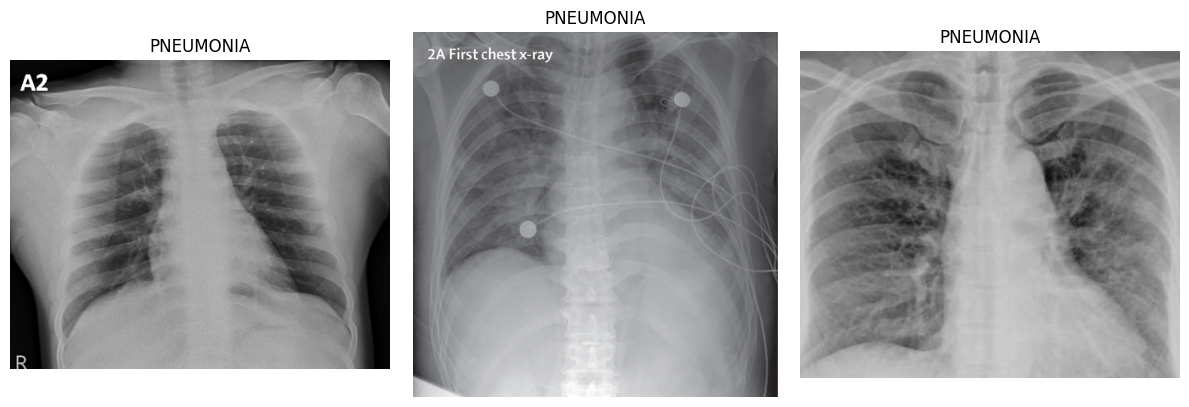

In [14]:
# Wähle 3 zufällige Bilder aus der Kategorie "PNEUMONIA"
random_pneumonia = df[df['label'] == 'PNEUMONIA'].sample(3)

# Erstelle ein Grid mit 1 Reihe und 3 Spalten für die Bilder
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Zeige Bilder aus "PNEUMONIA"
for i, row in enumerate(random_pneumonia.itertuples()):
    img = mpimg.imread(row.image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('PNEUMONIA')

# Zeige das Grid an
plt.tight_layout()
plt.show()

In [15]:
random_pneumonia = df[df['label'] == 'PNEUMONIA'].sample(6)

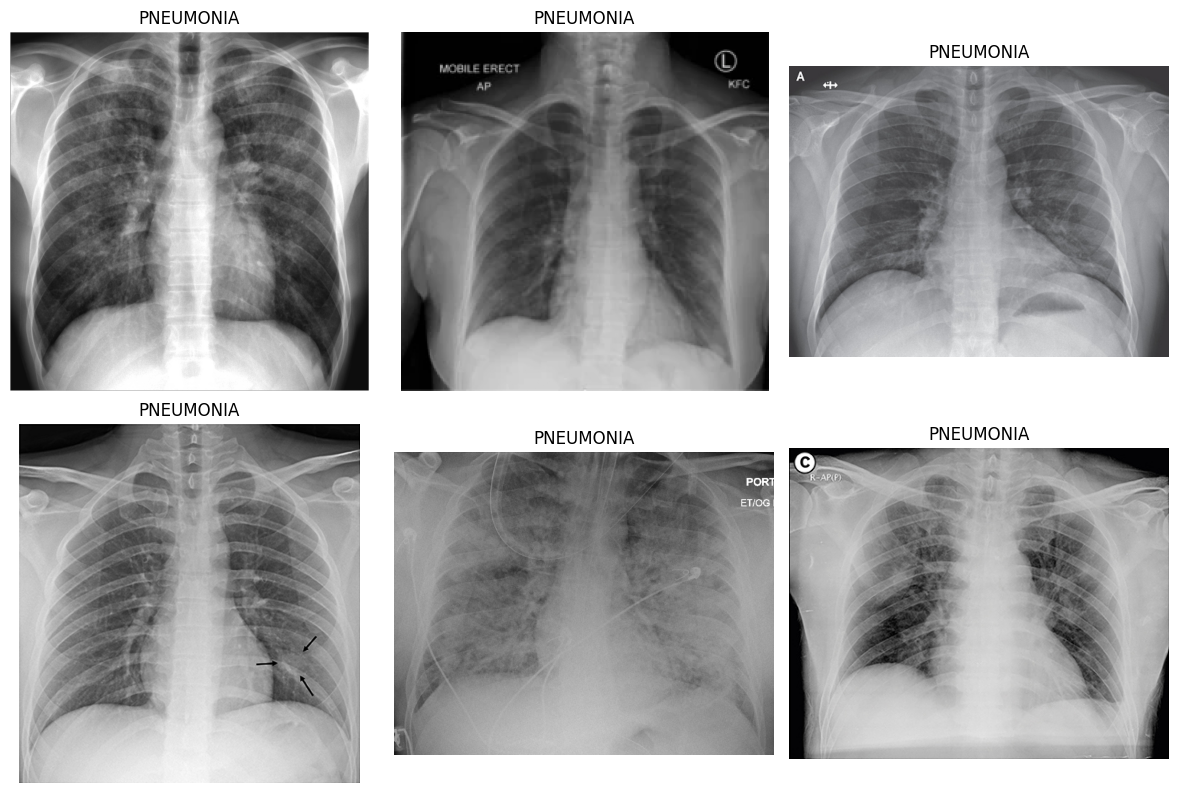

In [18]:
# Erstelle ein Grid mit 2 Reihen und 3 Spalten für die Bilder
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Zeige Bilder aus "PNEUMONIA"
for i, row in enumerate(random_pneumonia.itertuples()):
    img = mpimg.imread(row.image_path)
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].axis('off')
    axs[i // 3, i % 3].set_title('PNEUMONIA')

# Zeige das Grid an
plt.tight_layout()
plt.show()

**Deep Learning**

In [32]:
import cv2  
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import pandas as pd

In [20]:
# Parameter
img_size = (64, 64)  
num_classes = 1  # Bir sinif var sadece (PNEUMONIA)

# Erstelle leere Listen für die Bilder und Labels
x = []
y = []

# Lade die Bilder und Labels
for index, row in df.iterrows():
    img = cv2.imread(row['image_path'])
    img = cv2.resize(img, img_size)  # Größe anpassen
    x.append(img)
    y.append(1 if row['label'] == 'PNEUMONIA' else 0)

In [21]:
# Konvertiere in NumPy-Arrays
x = np.array(x) / 255.0  # Normalisieren
y = np.array(y)

In [22]:
# Modelling

In [31]:
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')  # Binary classification
])


In [24]:
# Kompiliere das Modell
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Trainiere das Modell
history = model.fit(x, y, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - accuracy: 0.6125 - loss: 0.4837 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 1.0431e-05
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 6.8438e-04 - val_accuracy: 1.0000 - val_loss: 9.4755e-08
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 1.0109e-04 - val_accuracy: 1.0000 - val_loss: 1.3858e-09
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 6.8245e-08 - val_accuracy: 1.0000 - val_loss: 3.2725e-11
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 1.2938e-06 - val_accuracy: 1.0000 - val_loss: 1.2144e-12
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 1.3554e-05 - val_accuracy: 1.0000 - val_loss: 6.8362e-14
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 1.0000 - los

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467,013 (9.41 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,644,676 (6.27 MB)

**Result Visualization**

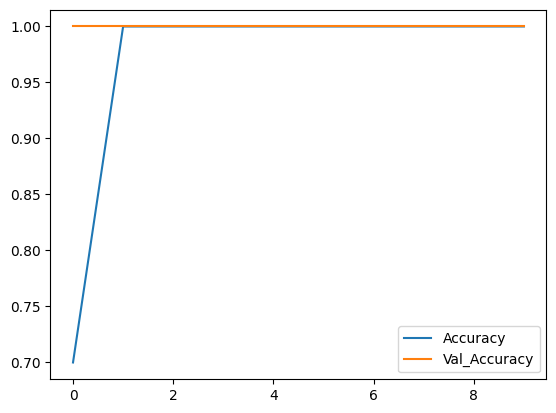

In [27]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend();